# Regression Model with Keras

## Introduction
This project demonstrates how to build a regression model using the Keras library. The dataset used in this project is concert dataset that including features such as Cement, Blast Furnace Slag, and Fly Ash. The goal is to predict concrete compositions and strength characteristics.

## Libraries Used
We will use the following libraries:
- `pandas` for data manipulation and analysis
- `numpy` for numerical operations
- `tensorflow` and `keras` for building and training the regression model

## Steps Involved
1. **Data Preprocessing**: Load the dataset, handle missing values (if there), and perform feature scaling.
2. **Model Building**: Create a Sequential model with Dense layers using Keras.
3. **Model Training**: Compile and train the model on the training data.
4. **Model Evaluation**: Evaluate the model's performance on the test data using appropriate regression metrics.


In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import warnings
warnings.filterwarnings('ignore')

### Reading The Data :

we use the `matplotlib.pyplot` library to read our data as csv file with `read_csv` command and save it in variable called `data`

second, we show the first 10 rows of data with `head(10)` command.


In [30]:
concrete_data = pd.read_csv('concrete_data.csv')
concrete_data.head(10)

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
5,266.0,114.0,0.0,228.0,0.0,932.0,670.0,90,47.03
6,380.0,95.0,0.0,228.0,0.0,932.0,594.0,365,43.70
7,380.0,95.0,0.0,228.0,0.0,932.0,594.0,28,36.45
8,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
9,475.0,0.0,0.0,228.0,0.0,932.0,594.0,28,39.29


In [9]:
concrete_data.isnull().sum()

Cement                0
Blast Furnace Slag    0
Fly Ash               0
Water                 0
Superplasticizer      0
Coarse Aggregate      0
Fine Aggregate        0
Age                   0
Strength              0
dtype: int64

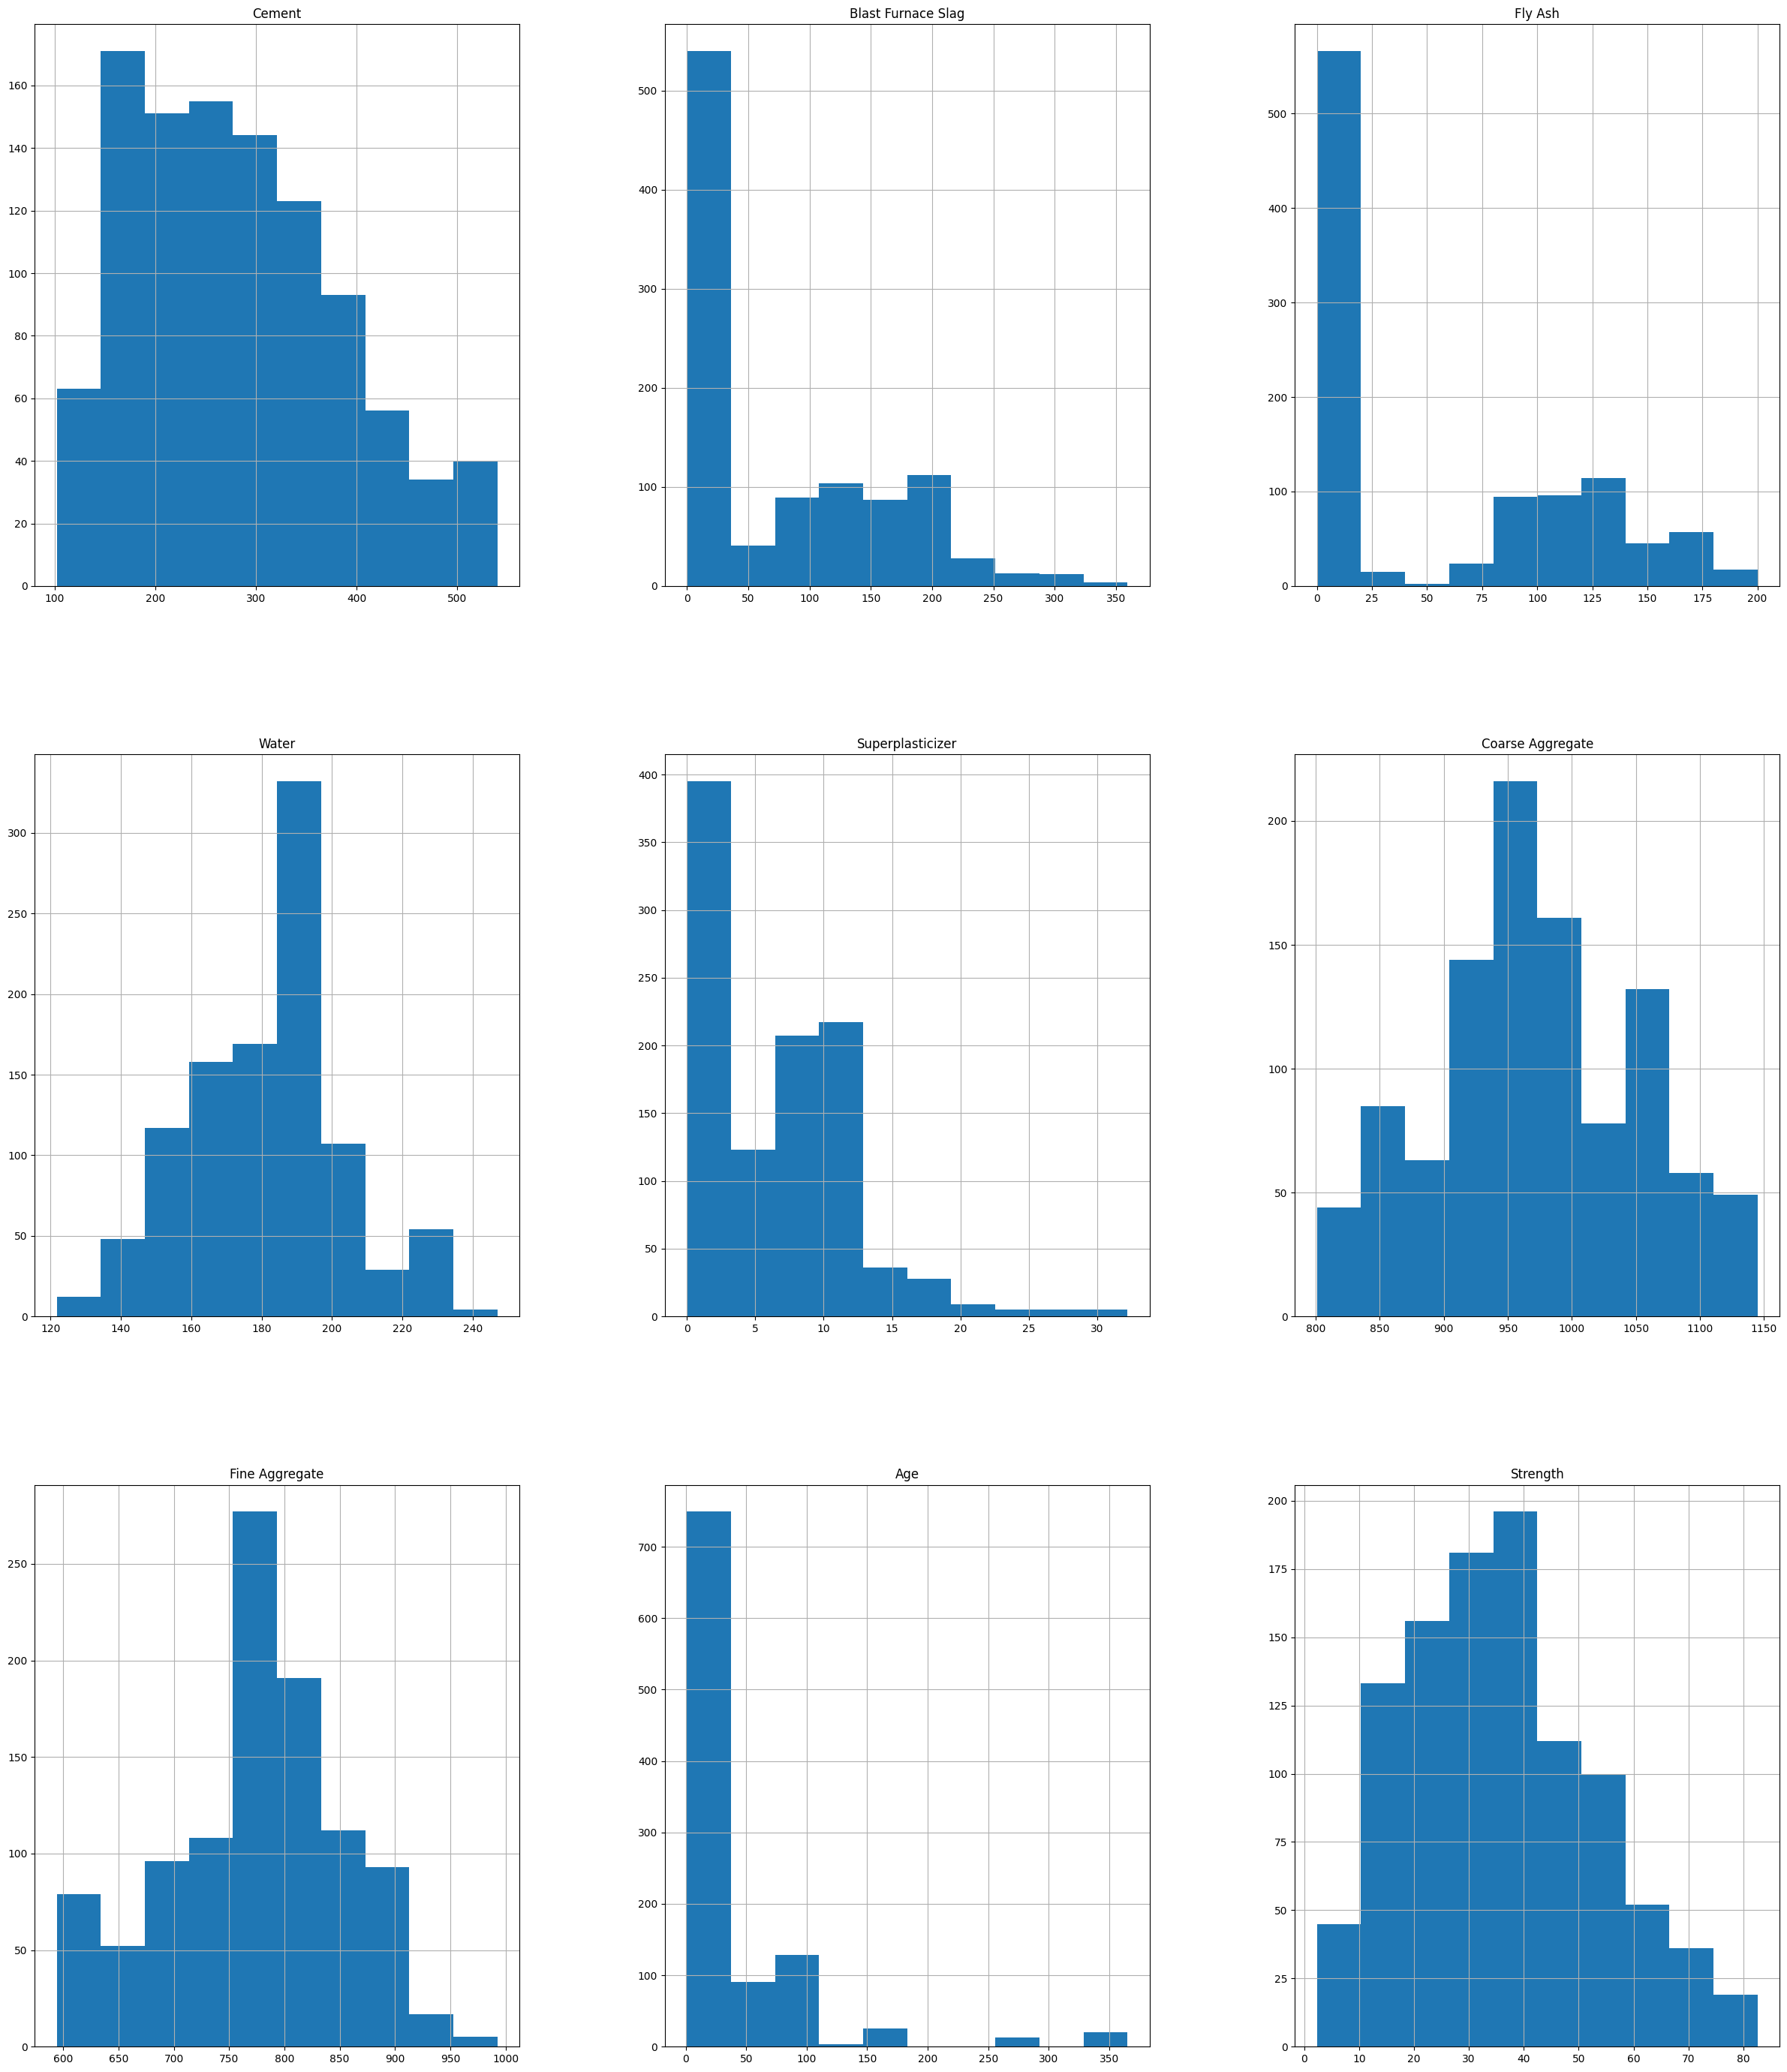

In [27]:
concrete_data.hist(bins=10, figsize=(30,35))
plt.show()

### Prepare Data for Machine Learning

Preparing a dataset for machine learning by splitting it into features and target variables, and normalizing the feature set:

1. **Create Feature Set (X) and Target Variable (y)**:
    - `X = concrete_data.drop(["Strength"], axis=1)`: This line creates the feature set `X` by dropping the 'Strength' column from the `concrete_data` DataFrame.
    - `y = concrete_data['Strength']`: This line assigns the 'Strength' column to the target variable `y`.

3. **Normalize the Feature Set (X)**:
    - `X_norm = (X - X.mean()) / X.std()`: This line normalizes the feature set `X` by subtracting the mean and dividing by the standard deviation for each feature. This process ensures that the features have a mean of 0 and a standard deviation of 1, which can improve the performance of many machine learning algorithms.
    - `X_norm.head()`: This line displays the first few rows of the normalized feature set `X_norm`.

In [ ]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Drop the target variable 'Strength' from the dataset to create feature set X
X = concrete_data.drop(["Strength"], axis=1)
# Assign the target variable 'Strength' to y
y = concrete_data['Strength']

# Normalize the feature set X
X_norm = (X - X.mean()) / X.std()
X_norm.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
0,2.476712,-0.856472,-0.846733,-0.916319,-0.620147,0.862735,-1.217079,-0.279597
1,2.476712,-0.856472,-0.846733,-0.916319,-0.620147,1.055651,-1.217079,-0.279597
2,0.491187,0.795140,-0.846733,2.174405,-1.038638,-0.526262,-2.239829,3.551340
3,0.491187,0.795140,-0.846733,2.174405,-1.038638,-0.526262,-2.239829,5.055221
4,-0.790075,0.678079,-0.846733,0.488555,-1.038638,0.070492,0.647569,4.976069


# Create a Neural Network Model

Defining a function to create a neural network model using the Keras library. The model consists of an input layer, three hidden layers, and an output layer:

1. **Define the Model Creation Function**:
    ```python
    def create_model():
    ```
    - This line defines a function named `create_model` that will create and return a neural network model.

2. **Create the Model**:
    - `model = Sequential()`: This line initializes a sequential model, which is a linear stack of layers.

3. **Add the Input Layer**:
    - `model.add(Dense(10, activation='relu', input_shape=(X_norm.shape[1],)))`: This line adds a dense (fully connected) layer with 10 nodes and ReLU activation function. The `input_shape` parameter specifies the shape of the input data, which is the number of features in `X_norm`.

4. **Add Hidden Layers**:
    - we use `add(Dense(10, activation='relu'))` three times for adding three hidden layers to the model, each with 10 nodes and ReLU activation function.

5. **Add the Output Layer**:
- `model.add(Dense(1))`: This line adds an output layer with a single node. Since this is a regression problem, no activation function is specified for the output layer.

6. **Compile the Model**:
    - `model.compile(optimizer='adam', loss='mean_squared_error')`: This line compiles the model, specifying the Adam optimizer and mean squared error as the loss function.

7. **Return the Model**:
    - This line returns the compiled model.


In [ ]:
def create_model():
    # create model
    model = Sequential()
    model.add(Dense(10, activation='relu', input_shape=(X_norm.shape[1],)))
    #adding three hidden layers each of them has 10 nodes
    model.add(Dense(10, activation='relu'))
    model.add(Dense(10, activation='relu'))
    model.add(Dense(10, activation='relu'))
    model.add(Dense(1))
    
    # compile model
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

## Evaluate Model Performance with Multiple Splits

This code evaluates the performance of a neural network model by repeatedly splitting the data, training the model, and calculating the mean squared error (MSE):

1. **Initialize an Empty List for MSE Values**:
    ```python
    mse_list = []
    ```
    - This line initializes an empty list to store the MSE values for each iteration.

2. **Loop to Perform Multiple Splits and Evaluations**:
    - `for _ in range(50)`: This loop runs 50 iterations to perform multiple splits and evaluations.
    - `train_test_split(X, y, test_size=0.3, random_state=None)`: This function splits the data into training and testing sets with 30% of the data used for testing. The `random_state=None` parameter ensures a different random split each time.
    - `create_model()`: This function creates a new instance of the neural network model.
    - `model.fit(X_train, y_train, epochs=100, verbose=2)`: This method trains the model on the training data for 100 epochs.
    - `model.predict(X_test)`: This method makes predictions on the testing data.
    - `mean_squared_error(y_test, y_pred)`: This function calculates the MSE between the actual and predicted values.
    - `mse_list.append(mse)`: This line appends the calculated MSE to the `mse_list`.

3. **Calculate Mean and Standard Deviation of MSE**:
    - `np.mean(mse_list)`: This function calculates the mean of the MSE values.
    - `np.std(mse_list)`: This function calculates the standard deviation of the MSE values.

4. **Print the Results**:
    ```python
    print(f'Mean MSE: {mean_mse}')
    print(f'Standard Deviation of MSE: {std_mse}')
    ```
    - These lines print the mean and standard deviation of the MSE values, providing an overview of the model's performance across multiple splits.

In [25]:
mse_list = []

for _ in range(50):
    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=None)
    
    # Create and train the model
    model = create_model()
    model.fit(X_train, y_train, epochs=100, verbose=2)
    
    # Evaluate the model
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mse_list.append(mse)

# Calculate mean and standard deviation of MSE
mean_mse = np.mean(mse_list)
std_mse = np.std(mse_list)

print(f'Mean MSE: {mean_mse}')
print(f'Standard Deviation of MSE: {std_mse}')


Epoch 1/100
23/23 - 2s - 83ms/step - loss: 703.9720
Epoch 2/100
23/23 - 0s - 4ms/step - loss: 254.6533
Epoch 3/100
23/23 - 0s - 3ms/step - loss: 220.8337
Epoch 4/100
23/23 - 0s - 3ms/step - loss: 208.4532
Epoch 5/100
23/23 - 0s - 3ms/step - loss: 196.3334
Epoch 6/100
23/23 - 0s - 3ms/step - loss: 191.1064
Epoch 7/100
23/23 - 0s - 3ms/step - loss: 186.4711
Epoch 8/100
23/23 - 0s - 3ms/step - loss: 183.0215
Epoch 9/100
23/23 - 0s - 3ms/step - loss: 175.6830
Epoch 10/100
23/23 - 0s - 3ms/step - loss: 170.4652
Epoch 11/100
23/23 - 0s - 8ms/step - loss: 167.9373
Epoch 12/100
23/23 - 0s - 4ms/step - loss: 164.8162
Epoch 13/100
23/23 - 0s - 3ms/step - loss: 164.6416
Epoch 14/100
23/23 - 0s - 3ms/step - loss: 160.1062
Epoch 15/100
23/23 - 0s - 3ms/step - loss: 157.5789
Epoch 16/100
23/23 - 0s - 3ms/step - loss: 154.1383
Epoch 17/100
23/23 - 0s - 3ms/step - loss: 153.2247
Epoch 18/100
23/23 - 0s - 3ms/step - loss: 151.8588
Epoch 19/100
23/23 - 0s - 3ms/step - loss: 147.0850
Epoch 20/100
23/23 -

### Explanation of Code to Plot MSE vs. Epochs:


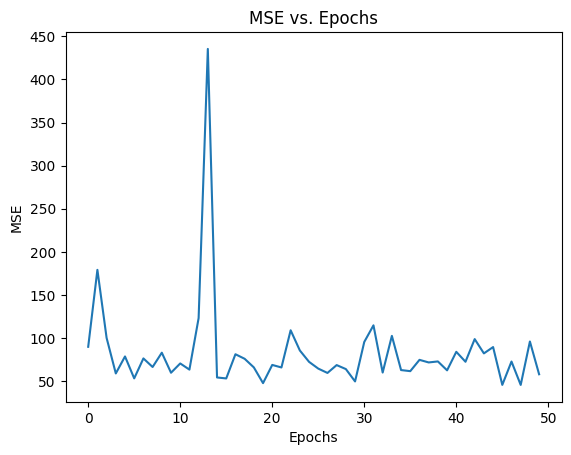

In [12]:
plt.plot(mse_list)
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.title('MSE vs. Epochs')
plt.show()